# zrod.io Example
This notebook demonstrates fetching a rod design from zrod.io
Note: The API key provided here is limited and may be revoked at anytime.
If you want to use and support this project, you should contact me (info@zrod.io)

In [1]:
import os
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import time

#interactive plots (zoom/pan and whatnot... uncomment the next line if you want that)
#%matplotlib notebook

In [2]:
API_KEY="ThisKeyIsLimitedToOneRequestPerMinute" #you should get your own API Key. Contact me for this.
isRateLimited = True

#check if you have a keyfile
if(os.path.isfile("./apikey.txt")):
    key_file = open("./apikey.txt", "r")
    filetext = key_file.read()
    key_file.close()
    if(len(filetext) > 20): #probably a valid key
        API_KEY=filetext
        isRateLimited = False
        print("Using your local API Key!")
    else:
        print("Oops, the local keyfile seems to be invalid!")
    
else:
    print("Using the default API Key... your requests are limited.")

Using your local API Key!


---
Setup the request object

Note: I am planning on cleaning up the fields here. Breaking changes may occur eventually.

In [3]:

example = {
	"WellName":"TEST_APP WELL",
	"SPM":4.2,
	"Fo":6000,
	"SG":1,
	"UseMeasuredPos":True,
	"Taper":[
		{"L":2285,"D":1,    "W":2.904,"E":30500000,"R":490,},
		{"L":2700,"D":0.875,"W":2.224,"E":30500000,"R":490,},
		{"L":4100,"D":0.75, "W":1.63, "E":30500000,"R":490,},
		{"L":350, "D":1.5,  "W":6.5,  "E":30500000,"R":490,},
		{"L":0,   "D":1.75, "W":8.2,  "E":30500000,"R":490,},
	],
	"Dup":0.05,
	"Ddn":0.20,
	"PU":{
		"Rotate":1,
		"A":111,
		"P":114,
		"C":96.05,
		"I":96,
		"K":151.34,
		"R":36.2,
		"Torque":228,
		"Structure":100,
		"MaxStroke":100,
		"Type":"C",
		"Double":False,
		"CBE":6000,
		"B":450,
		"RotaSprocketRadius":0,
		"RotaSprocketDist":0,
		"RotaWeightBox":0,
		"RotaWeightCb":0,
		"RotaWeightBelt":0,
		"HydUST":0,
		"HydTOS":0,
		"HydDST":0,
		"HydBOS":0
	},
	"PumpSpec":{
		"d":1.25,
		"l":144,
		"c":0.005
	},
	
    "Client": "github/jupyter",
	"WellId": "c3638901-238e-4a86-bb3f-f1d579bc01b1",
	"CalcFo":False,
	"FluidLevel":9435,
	"Viscosity":0.9,
	"CasingPressure":100,
	"TubingPressure":10,
	"SPM_Dyn":4.2,
	"dyno":[
		[0.1,19726],[0.1,19967],[0.3,20304],[0.4,20663],[0.6,20810],[1,20997],[1.4,21177],[1.9,21319],[2.3,21459],[2.9,21549],[3.6,21584],[4.3,21551],[5,21586],[5.9,21655],[6.9,21663],[7.8,21672],[8.8,21683],[9.9,21702],[11.1,21715],[12.2,21817],[13.4,22038],[14.7,22277],[16,22576],[17.4,22899],[18.8,23085],[20.2,23242],[21.7,23362],[23.2,23403],[24.7,23487],[26.2,23607],[27.8,23775],[29.4,23867],[31.1,23977],[32.7,24127],[34.4,24234],[36.1,24434],[37.8,24709],[39.5,24996],[41.2,25275],[42.9,25558],[44.6,25858],[46.3,26076],[48,26224],[49.7,26288],[51.4,26388],[53.1,26527],[54.9,26695],[56.5,26727],[58.2,26750],[59.9,26755],[61.7,26704],[63.3,26650],[65,26562],[66.7,26421],[68.4,26090],[70.1,25753],[71.7,25448],[73.4,25251],[75,24856],[76.6,24608],[78.2,24545],[79.8,24460],[81.4,24335],[82.9,24200],[84.3,24067],[85.8,24027],[87.3,24008],[88.6,24036],[90,24192],[91.4,24276],[92.7,24414],[94,24666],[95.2,24913],[96.4,25125],[97.7,25312],[98.8,25651],[100,25811],[101.1,25874],[102.2,26058],[103.3,26105],[104.3,26120],[105.3,26278],[106.4,26268],[107.3,26220],[108.3,26235],[109.2,26082],[110.1,25953],[111,25949],[111.8,25803],[112.5,25581],[113.3,25278],[114.1,25259],[114.7,25040],[115.4,24603],[116,24729],[116.6,24634],[117.1,24385],[117.6,24492],[118,24507],[118.5,24462],[118.9,24442],[119.1,24472],[119.4,24540],[119.6,24648],[119.9,24828],[119.9,25012],[119.9,25059],[119.9,25059],[119.9,24989],[119.7,24761],[119.4,24502],[119.1,24221],[118.9,23913],[118.4,23656],[117.9,23437],[117.3,23255],[116.7,23091],[116,22872],[115.1,22649],[114.2,22523],[113.3,22349],[112.3,22171],[111.2,22007],[110,21672],[108.8,21389],[107.5,21185],[106.1,21183],[104.7,21163],[103.3,21135],[101.8,21105],[100.1,21041],[98.5,20873],[96.8,20607],[95.2,20415],[93.4,20406],[91.6,20486],[89.8,20561],[88,20603],[86.1,20590],[84.2,20512],[82.3,20137],[80.4,19513],[78.4,18686],[76.5,17715],[74.6,17259],[72.8,17071],[71,17073],[69.1,17070],[67.3,17050],[65.4,16909],[63.5,16813],[61.7,16750],[59.7,16689],[57.8,16617],[55.9,16518],[54,16304],[52.1,16250],[50.1,16290],[48.2,16406],[46.3,17074],[44.5,17855],[42.6,18584],[40.6,18892],[38.7,19084],[36.9,19188],[35,19224],[33.1,19260],[31.4,19301],[29.6,19345],[27.9,19360],[26.2,19341],[24.7,19362],[23.1,19516],[21.6,19627],[20.1,19687],[18.7,19683],[17.3,19339],[15.9,18866],[14.6,18324],[13.3,17878],[12.2,17546],[11,17375],[9.9,17489],[8.8,17468],[7.9,17444],[6.9,17448],[6,17631],[5.1,17830],[4.4,17997],[3.7,17949],[3,17946],[2.3,17912],[1.9,17805],[1.4,18004],[1,18312],[0.6,18707],[0.4,19163],[0.3,19521],[0.1,19769],[0.1,19726]
	],
	"DiagTargetDX":25,
}


In [4]:
def ProcessAndDisplayDesign(design): #go fetch the request. This may take a couple of seconds.
    r = requests.post("https://api.zrod.io", json=design, headers={"x-api-key": API_KEY})
    if(r.status_code == 429):
        print("Your API Key is probably over quota")
        return()
    elif(r.status_code != 200):
        print("Looks like something went wrong!", r.status_code)
        return()
    
        
    result = json.loads(r.content)
    
    #if you want to see all results, print this
    #print(json.dumps(design, sort_keys=True, indent=4))

    
    #This is the predicted surface dyno (calculated by zrod.io)
    predSfc = np.array(result["Sfc"])
    x,y = predSfc.T
    plt.plot(x, y, c="Red")

    #This is the predicted downhole card (calculated by zrod.io)
    predPmp = np.array(result["Pmp"])
    x,y = predPmp.T
    plt.plot(x, y, c="LightGreen")


    #measured surface card from the original design request
    measSfc = np.array(design["dyno"]) #note: this is from an input, not a result
    x,y = measSfc.T
    plt.plot(x, y, c="Blue")

    #calculated card from the measured surface card (calculated by zrod.io)
    diagPmp = np.array(result["pumpcard"])
    x,y = diagPmp.T
    plt.plot(x, y, c="DarkGreen")

    plt.show()

---
This cell fetched the design from the given example

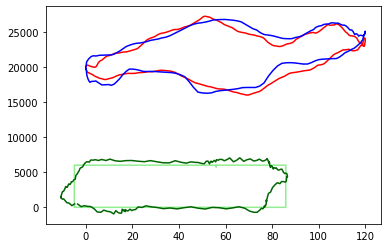

In [5]:
ProcessAndDisplayDesign(example)

---
This cell fetches a design for each Fo (from 2000 LBS to 10000 LBS at 500 LB steps)

Varying the Fluid Load will only alter the predicted surface & pump cards.

The rate limited key adds an artificial delay. You really should contact me for an api key if you plan on running this section.

Fetching Design for Fo: 2000


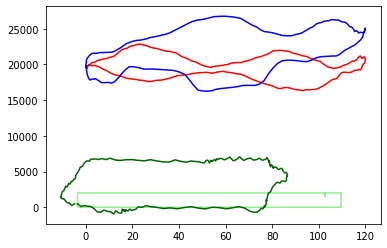

Fetching Design for Fo: 2500


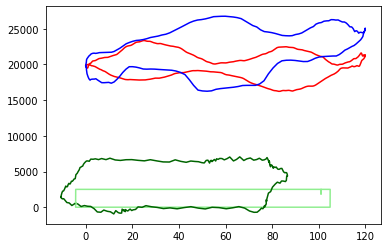

Fetching Design for Fo: 3000


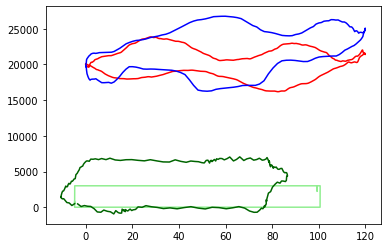

Fetching Design for Fo: 3500


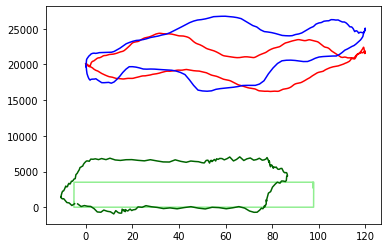

Fetching Design for Fo: 4000


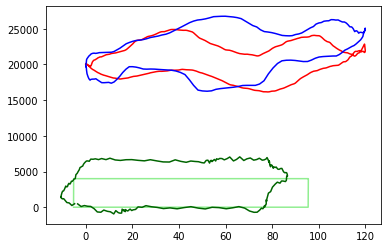

Fetching Design for Fo: 4500


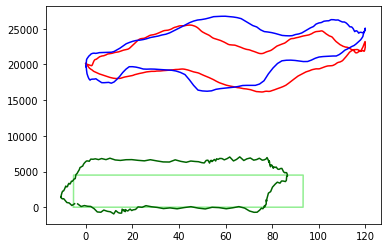

Fetching Design for Fo: 5000


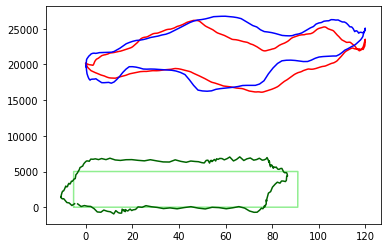

Fetching Design for Fo: 5500


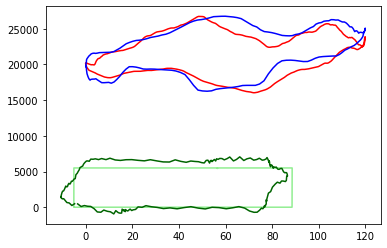

Fetching Design for Fo: 6000


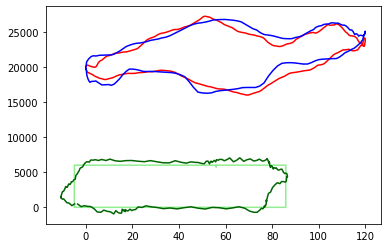

Fetching Design for Fo: 6500


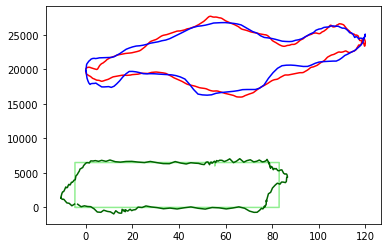

Fetching Design for Fo: 7000


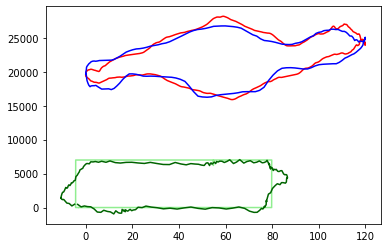

Fetching Design for Fo: 7500


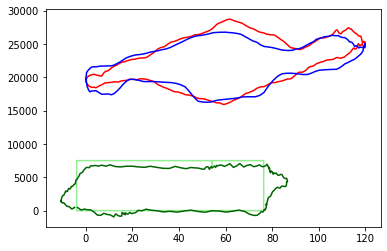

Fetching Design for Fo: 8000


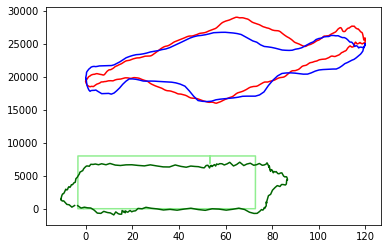

Fetching Design for Fo: 8500


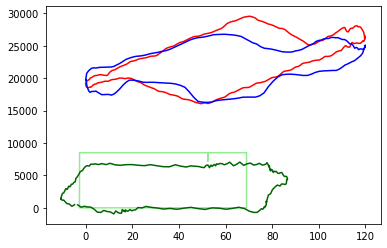

Fetching Design for Fo: 9000


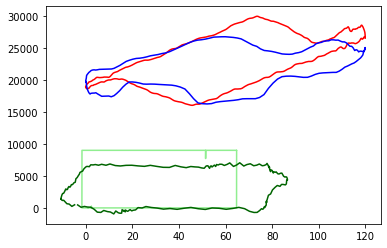

Fetching Design for Fo: 9500


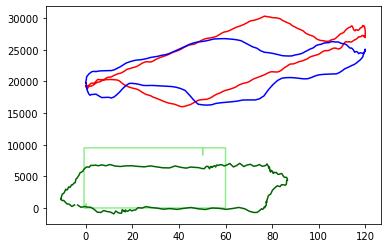

Fetching Design for Fo: 10000


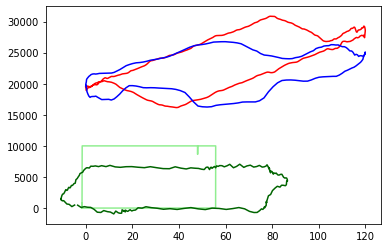

In [7]:
for x in range(2000, 10001, 500):
    example["Fo"] = x                    #update the field we are varying
    print("Fetching Design for Fo:", x)  #display that value 
    
    if(isRateLimited):                   #if you have an apikey.txt file, this is ignored
        print("Adding a delay for the rate limited key...")
        time.sleep(60)
    
    ProcessAndDisplayDesign(example)     #go fetch the design and display it
